In [1]:
import numpy as np
from scipy import special
from scipy import integrate
import matplotlib.pyplot as plt
#%matplotlib inline
#plt.rcParams['figure.dpi'] = 250
from math import pi
import math
import scipy.stats
from scipy import constants
import scipy.optimize as opt

In [14]:
import skimage.measure
def iso_plot(func, rmax, contlev, label):
    coord_no = 100
    x = np.linspace(-rmax, rmax, coord_no)
    y = np.linspace(-rmax, rmax, coord_no)
    z = np.linspace(-rmax, rmax, coord_no)
    X,Y,Z = np.meshgrid(x,y,z)
    data = func(X, Y, Z)
    verts_pos, faces_pos, _, _ = skimage.measure.marching_cubes(data, contlev)
    verts_pos_scaled = verts_pos * 2 * rmax / coord_no - rmax
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_trisurf(verts_pos_scaled[:,0], verts_pos_scaled[:,1],
                    verts_pos_scaled[:,2], triangles=faces_pos, lw=0)
    if np.min(data) < 0:
        verts_neg, faces_neg, _, _ = skimage.measure.marching_cubes(data, -contlev)
        verts_neg_scaled = verts_neg * 2 * rmax / coord_no - rmax
        ax.plot_trisurf(verts_neg_scaled[:,0], verts_neg_scaled[:,1],
                        verts_neg_scaled[:,2], triangles=faces_neg, lw=0)
    ax.set_xlim([-rmax, rmax])
    ax.set_ylim([-rmax, rmax])
    ax.set_zlim([-0.65*rmax, 0.65*rmax])
    ax.set_title(label)
    ax.set_xlabel(r"$x / a_0$")
    ax.set_ylabel(r"$y / a_0$")
    ax.set_zlabel(r"$z / a_0$")
    plt.show()

## Section 1: Radial functions of the atomic orbitals

In [9]:
# Wave functions in table 5.1

def R1s(r):
    return 2*np.exp(-r)

def R2s(r):
    return (2-r)*np.exp(-r/2)/(2*np.sqrt(2))

def R2p(r):
    return r*np.exp(-r/2)/(2*np.sqrt(6))

def R3s(r):
    return 2*(27-18*r+2*r**2)*np.exp(-r/3)/(81*np.sqrt(3))

def R3p(r):
    return 2*np.sqrt(2)*(6-r)*r*np.exp(-r/3)/(81*np.sqrt(3))

def R3d(r):
    return 2*np.sqrt(2)*r**2*np.exp(-r/3)/(81*np.sqrt(15))

In [10]:
# Investigate normalisation

inner_1s = integrate.quad(lambda r: r**2*(R1s(r))**2, 0, 1000)[0]
print(inner_1s)

inner_2s = integrate.quad(lambda r: r**2*(R2s(r))**2, 0, 1000)[0]
print(inner_2s)

inner_2p = integrate.quad(lambda r: r**2*(R2p(r))**2, 0, 1000)[0]
print(inner_2p)

inner_3s = integrate.quad(lambda r: r**2*(R3s(r))**2, 0, 1000)[0]
print(inner_3s)

inner_3p = integrate.quad(lambda r: r**2*(R3p(r))**2, 0, 1000)[0]
print(inner_3p)

inner_3d = integrate.quad(lambda r: r**2*(R3d(r))**2, 0, 1000)[0]
print(inner_3d)

1.0
0.9999999999999998
1.0000000000000002
1.0
1.0
1.0


From this, we have verified that the given wave functions in Table 5.1 are normalised

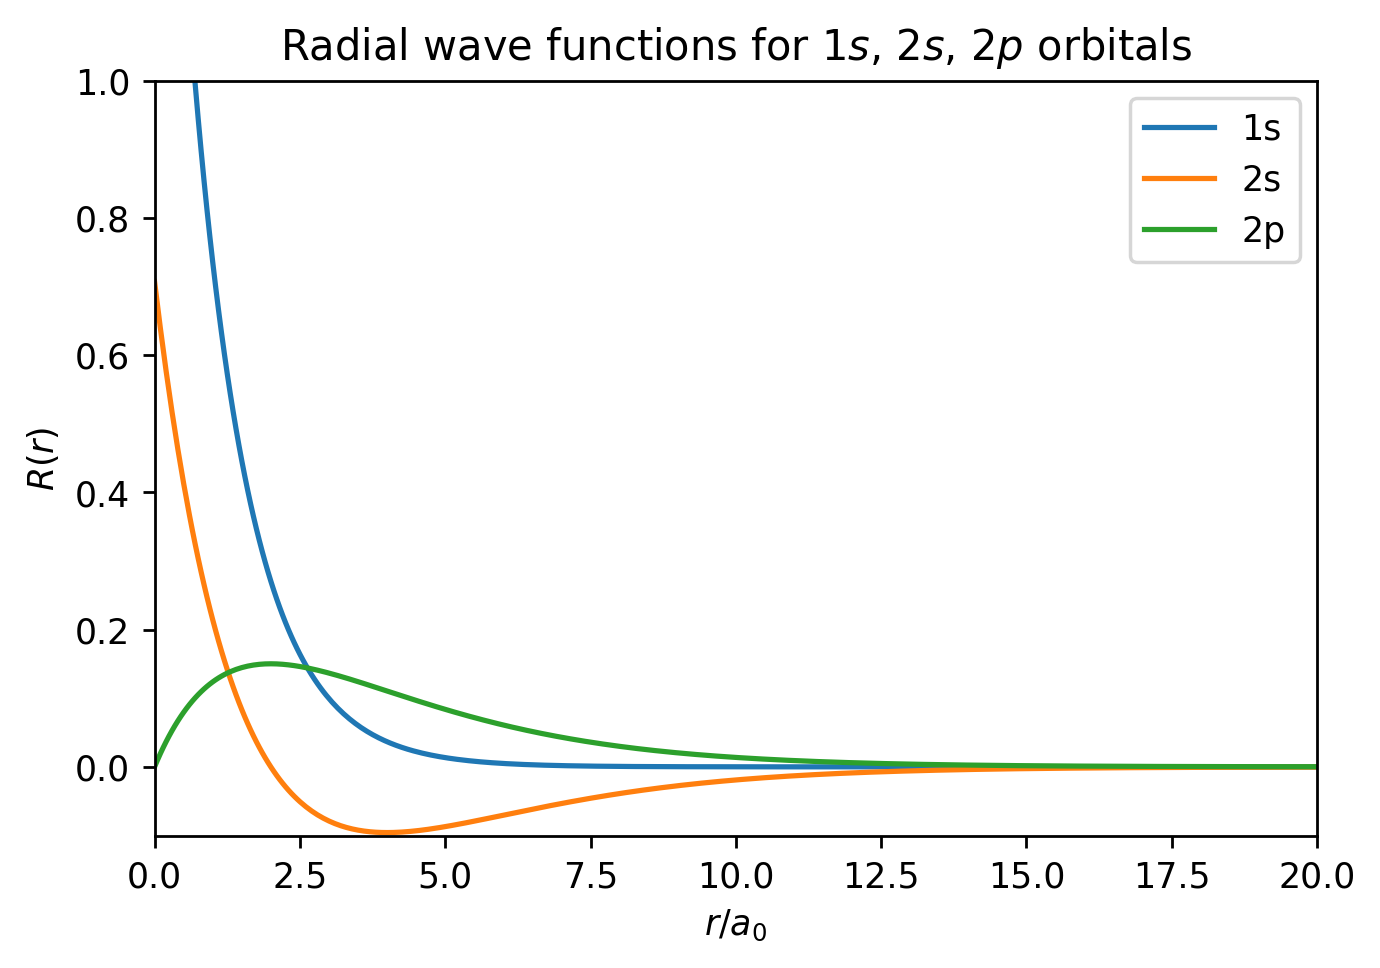

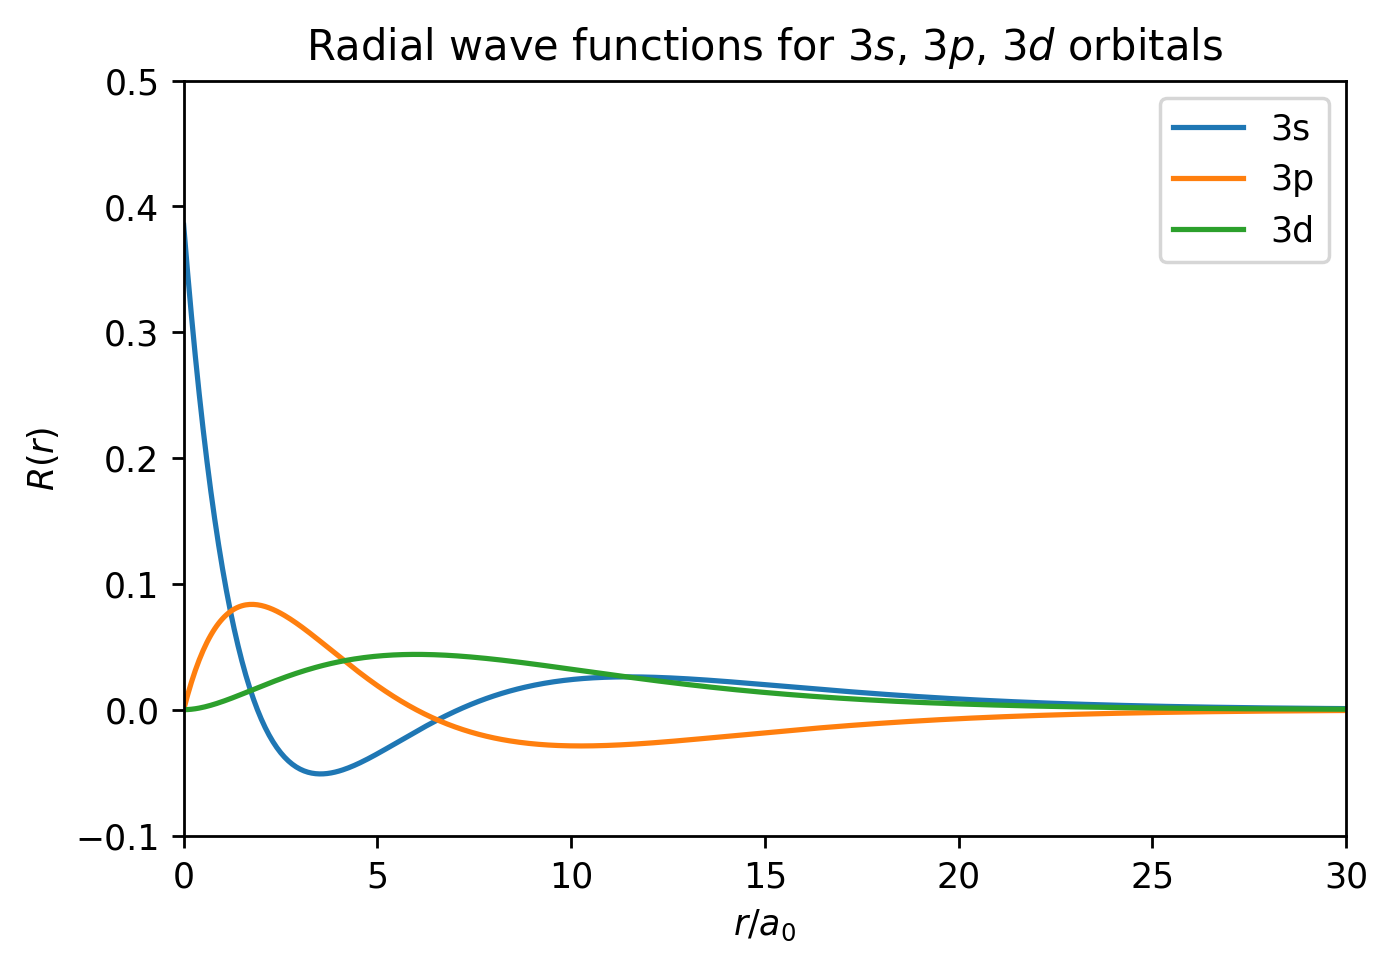

In [11]:
# Plotting radial wave functions
r_space = np.linspace(0, 50, 1000)
plt.plot(r_space, R1s(r_space), label='1s')
plt.plot(r_space, R2s(r_space), label='2s')
plt.plot(r_space, R2p(r_space), label='2p')
plt.xlim((0, 20))
plt.ylim((-0.1, 1))
plt.legend()
plt.xlabel(r'$r/a_0$')
plt.ylabel(r'$R(r)$')
plt.title(r'Radial wave functions for $1s$, $2s$, $2p$ orbitals')
plt.show()

plt.plot(r_space, R3s(r_space), label='3s')
plt.plot(r_space, R3p(r_space), label='3p')
plt.plot(r_space, R3d(r_space), label='3d')
plt.xlim((0, 30))
plt.ylim((-0.1, 0.5))
plt.xlabel(r'$r/a_0$')
plt.ylabel(r'$R(r)$')
plt.title(r'Radial wave functions for $3s$, $3p$, $3d$ orbitals')
plt.legend()

plt.show()

From this, it can be seen that only $s$ orbitals have a non-zero wave function at $r=0$. The number of radial nodes can be seen to equal $n-l-1$. It is also clear that all of them tend to zero at large $r$.

For the $s$ orbitals, its value at zero decreases with $n$.

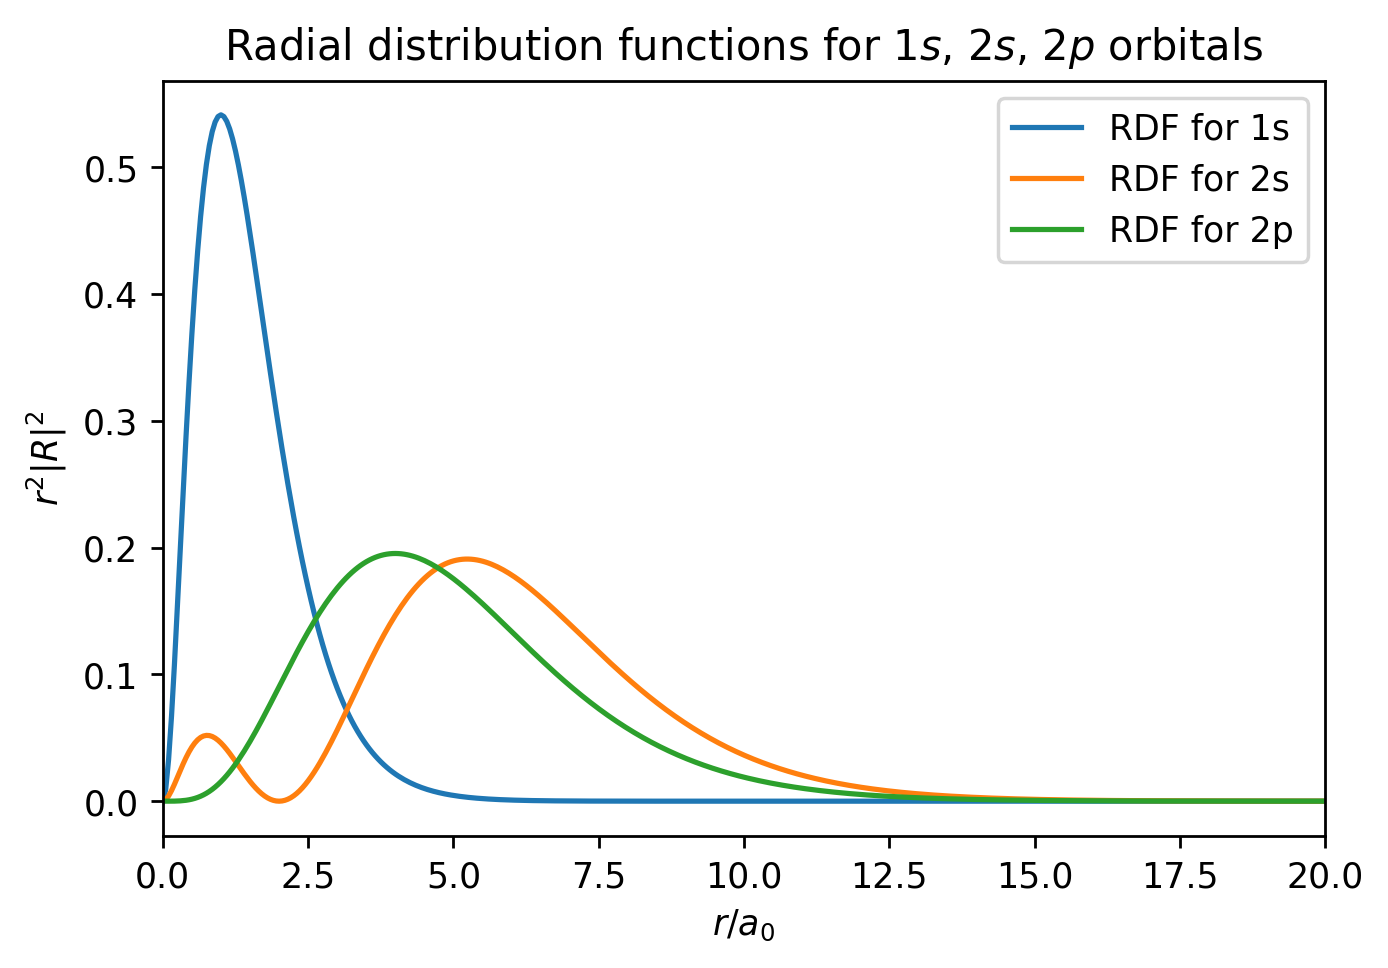

In [12]:
# Radial distribution functions
plt.plot(r_space, r_space**2*(R1s(r_space))**2, label='RDF for 1s')
plt.plot(r_space, r_space**2*(R2s(r_space))**2, label='RDF for 2s')
plt.plot(r_space, r_space**2*(R2p(r_space))**2, label='RDF for 2p')
plt.legend()
plt.xlim((0, 20))
plt.xlabel(r'$r/a_0$')
plt.ylabel(r'$r^2|R|^2$')
plt.title(r'Radial distribution functions for $1s$, $2s$, $2p$ orbitals')
plt.show()

From this, the main trends and features of the $1s$, $2s$ and $2p$ orbitals can be seen. The number of radial nodes is equal to $n-l-1$, and the peak of the RDF moves outwards and downwards with $n$. 

A result is that the $2s$ orbital penetrates into the $1s$ orbital.

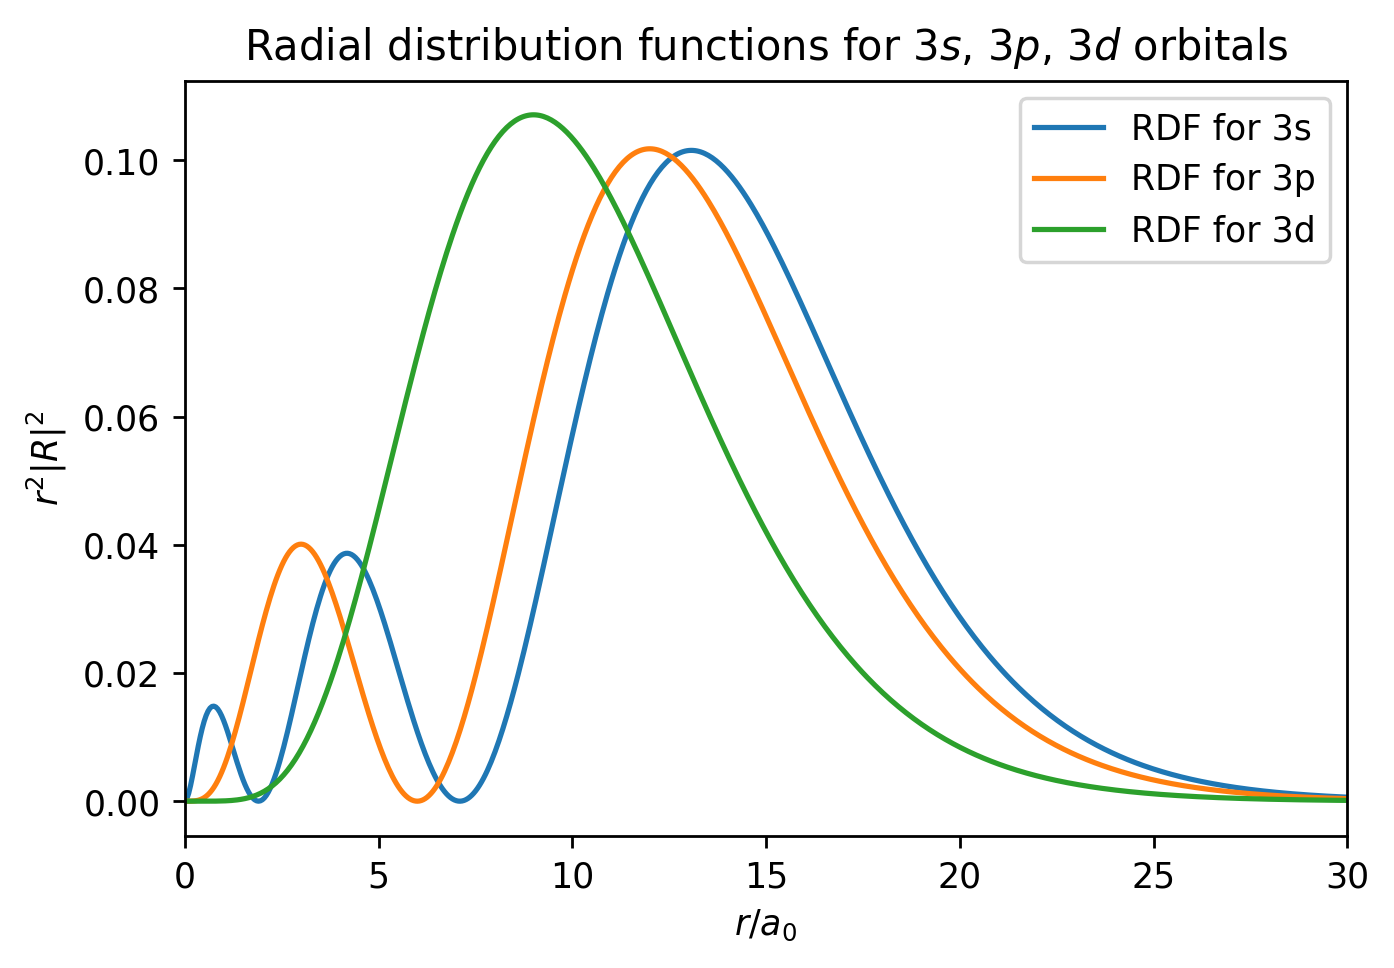

In [13]:
plt.plot(r_space, r_space**2*(R3s(r_space))**2, label='RDF for 3s')
plt.plot(r_space, r_space**2*(R3p(r_space))**2, label='RDF for 3p')
plt.plot(r_space, r_space**2*(R3d(r_space))**2, label='RDF for 3d')
plt.legend()
plt.xlim((0, 30))
plt.xlabel(r'$r/a_0$')
plt.ylabel(r'$r^2|R|^2$')
plt.title(r'Radial distribution functions for $3s$, $3p$, $3d$ orbitals')
plt.show()

The trend that the number of radial nodes is $n-l-1$ still holds. The peak moves backwards with angular momentum quantum number $l$.

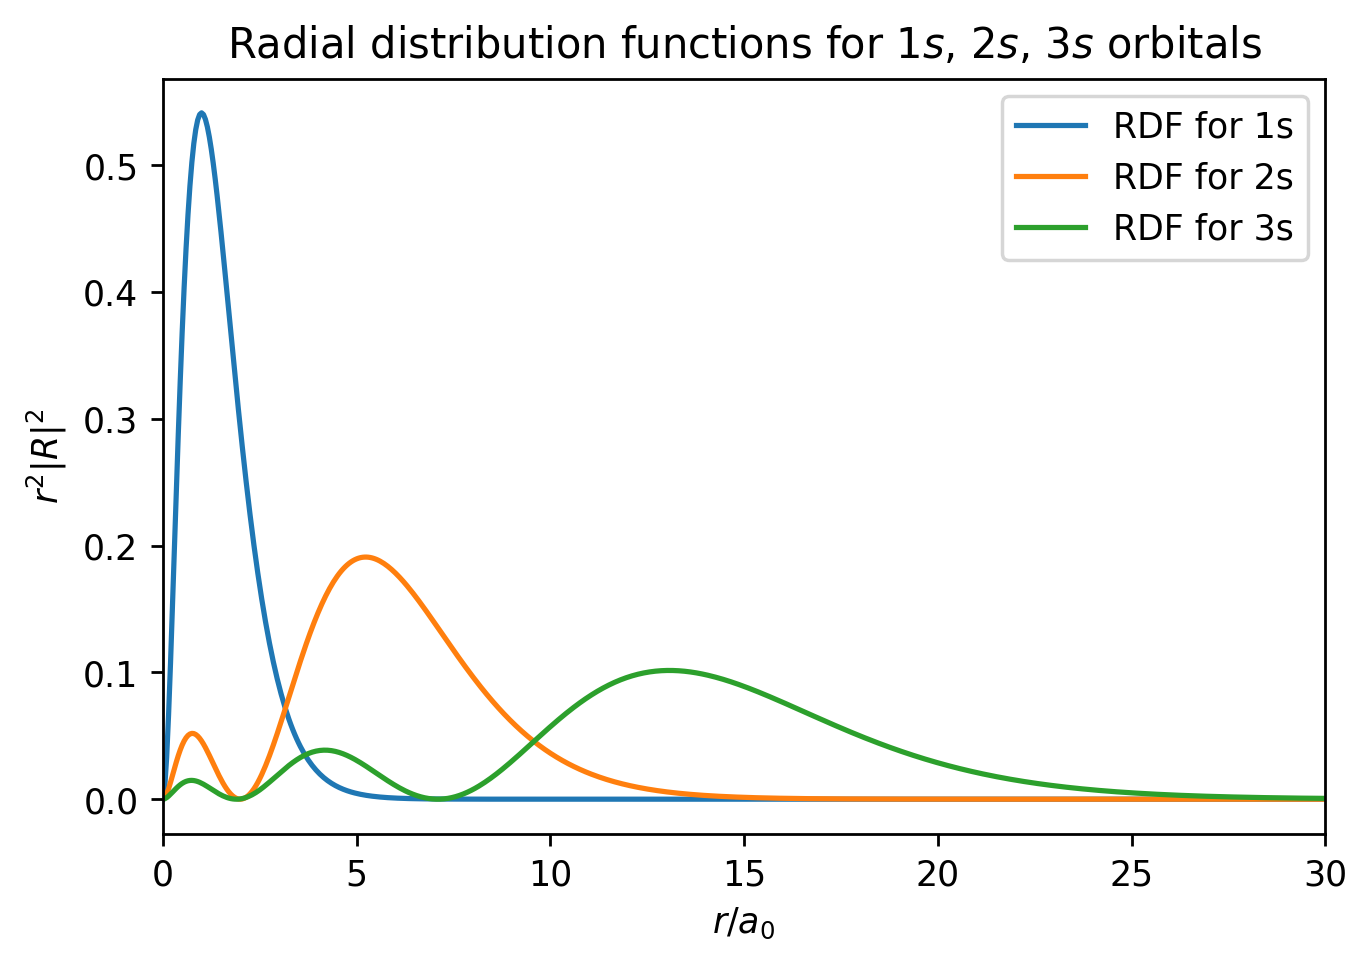

In [14]:
plt.plot(r_space, r_space**2*(R1s(r_space))**2, label='RDF for 1s')
plt.plot(r_space, r_space**2*(R2s(r_space))**2, label='RDF for 2s')
plt.plot(r_space, r_space**2*(R3s(r_space))**2, label='RDF for 3s')
plt.legend()
plt.xlim((0, 30))
plt.xlabel(r'$r/a_0$')
plt.ylabel(r'$r^2|R|^2$')
plt.title(r'Radial distribution functions for $1s$, $2s$, $3s$ orbitals')
plt.show()

As $n$ increases, the peak of the RDF moves outwards and downwards. Both $2s$ and $3s$ penetrate into the previous orbitals.

## Section 2: Roots and turning points

In [15]:
# Radial nodes exist for orbitals 2s, 3s, and 3p

node_2s = opt.fsolve(lambda r: R2s(r), [2.1])
print(f'Node at 2s:{node_2s}')

node_3s = opt.fsolve(lambda r: R3s(r), [2.1, 7])
print(f'Node at 3s:{node_3s}')

node_3p = opt.fsolve(lambda r: R3p(r), [6.1])
print(f'Node at 3p:{node_3p}')

Node at 2s:[2.]
Node at 3s:[1.90192379 7.09807621]
Node at 3p:[6.]


In [16]:
# Maxima for all RDFs

max_1s = opt.fmin(lambda r: -r**2*R1s(r)**2, 1, disp=False)
print(f'Maximum for 1s RDF:{max_1s}')

max_2s1, max_2s2 = opt.fmin(lambda r: -r**2*R2s(r)**2, 1, disp=False), opt.fmin(lambda r: -r**2*R2s(r)**2, 7, disp=False)
print(f'Maxima for 2s RDF:{max_2s1}, {max_2s2}')

max_2p = opt.fmin(lambda r: -r**2*R2p(r)**2, 4, disp=False)
print(f'Maximum for 2p RDF:{max_2p}')

max_3s1, max_3s2, max_3s3 = opt.fmin(lambda r: -r**2*R3s(r)**2, 1, disp=False), opt.fmin(lambda r: -r**2*R3s(r)**2, 5, disp=False), opt.fmin(lambda r: -r**2*R3s(r)**2, 12, disp=False)
print(f'Maxima for 3s RDF:{max_3s1}, {max_3s2}, {max_3s3}')

max_3p1, max_3p2 = opt.fmin(lambda r: -r**2*R3p(r)**2, 1, disp=False), opt.fmin(lambda r: -r**2*R3p(r)**2, 7, disp=False)
print(f'Maxima for 3p RDF:{max_3p1}, {max_3p2}')

max_3d = opt.fmin(lambda r: -r**2*R3d(r)**2, 10, disp=False)
print(f'Maximum for 3d RDF:{max_3d}')

Maximum for 1s RDF:[1.]
Maxima for 2s RDF:[0.76396484], [5.23607178]
Maximum for 2p RDF:[4.]
Maxima for 3s RDF:[0.74003906], [4.18591309], [13.07402344]
Maxima for 3p RDF:[3.], [11.99997559]
Maximum for 3d RDF:[9.]


Nodes of radial wave functions:

|Orbital|Positions of nodes/$a_0$|
|-------|------------------|
|2s | 2 |
|3s|1.90, 7.10 |
|3p|6|

Maxima for radial distribution functions:

|Orbital|Positions of RDF maxima/$a_0$|
|-------|---------------------------|
|1s| 1|
|2s|0.764, 5.236|
|2p|4|
|3s|0.740, 4.186, 13.074|
|3p|3, 12.00|
|3d|9|

## Section 3: Iso-surface plots

In [15]:
# Cartesian representation of orbitals

# n = 1

def R1s_cart(x,y,z):
    r = np.sqrt(x**2+y**2+z**2)
    return np.exp(-r)/np.sqrt(pi)

# n = 2

def R2s_cart(x,y,z):
    r = np.sqrt(x**2+y**2+z**2)
    return (2-r)*np.exp(-0.5*r)/np.sqrt(32*pi)

def R2px_cart(x,y,z):
    r = np.sqrt(x**2+y**2+z**2)
    return x*np.exp(-r/2)/np.sqrt(32*pi)

def R2py_cart(x,y,z):
    r = np.sqrt(x**2+y**2+z**2)
    return y*np.exp(-r/2)/np.sqrt(32*pi)

def R2pz_cart(x,y,z):
    r = np.sqrt(x**2+y**2+z**2)
    return z*np.exp(-r/2)/np.sqrt(32*pi)

# n = 3

def R3s_cart(x,y,z):
    r = np.sqrt(x**2+y**2+z**2)
    return (27-18*r+2*r**2)*np.exp(-r/3)/(81*np.sqrt(3*pi))

def R3px_cart(x,y,z):
    r = np.sqrt(x**2+y**2+z**2)
    return 2*(6-r)*x*np.exp(-r/3)/(81*np.sqrt(2*pi))

def R3py_cart(x,y,z):
    r = np.sqrt(x**2+y**2+z**2)
    return 2*(6-r)*y*np.exp(-r/3)/(81*np.sqrt(2*pi))

def R3pz_cart(x,y,z):
    r = np.sqrt(x**2+y**2+z**2)
    return 2*(6-r)*z*np.exp(-r/3)/(81*np.sqrt(2*pi))

def R3dz2_cart(x,y,z):
    r = np.sqrt(x**2+y**2+z**2)
    return (3*z**2-r**2)*np.exp(-r/3)/(81*np.sqrt(6*pi))

def R3d_xz_cart(x,y,z):
    r = np.sqrt(x**2+y**2+z**2)
    return 2*x*z*np.exp(-r/3)/(81*np.sqrt(2*pi))

def R3d_xy_cart(x,y,z):
    r = np.sqrt(x**2+y**2+z**2)
    return 2*x*y*np.exp(-r/3)/(81*np.sqrt(2*pi))

def R3d_yz_cart(x,y,z):
    r = np.sqrt(x**2+y**2+z**2)
    return 2*y*z*np.exp(-r/3)/(81*np.sqrt(2*pi))


def R3d_x2y2_cart(x,y,z):
    r = np.sqrt(x**2+y**2+z**2)
    return (x**2-y**2)*np.exp(-r/3)/(81*np.sqrt(2*pi))


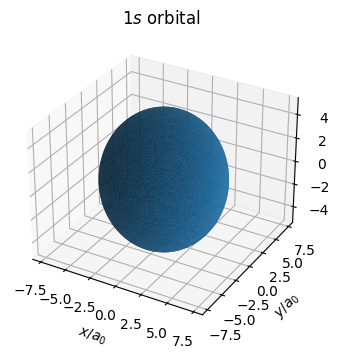

In [16]:
# Iso-surface plot for n=1

iso_plot(R1s_cart, 8, 0.002, r'$1s$ orbital')

It is clear that the $1s$ orbital has no nodes and is spherically symmetrical.

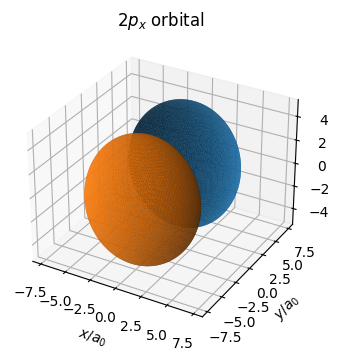

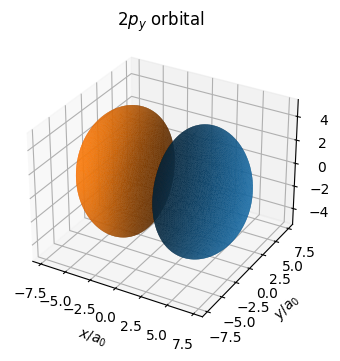

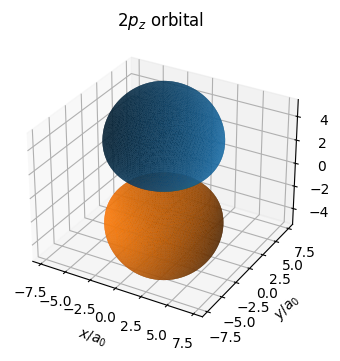

In [17]:
# Iso-surface plots for n=2, l=1

iso_plot(R2px_cart, 8, 0.015, r'$2p_x$ orbital')

iso_plot(R2py_cart, 8, 0.015, r'$2p_y$ orbital')

iso_plot(R2pz_cart, 8, 0.015, r'$2p_z$ orbital')

From this, it can be seen that the $2p$ orbitals are all the same shape, azimuthally symmetric around a specific Cartesian axis, with 1 nodal plane.

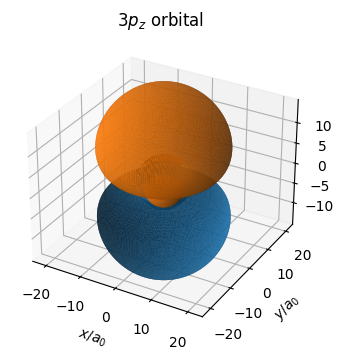

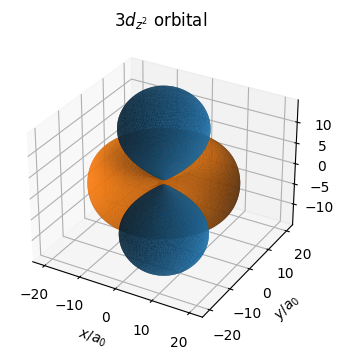

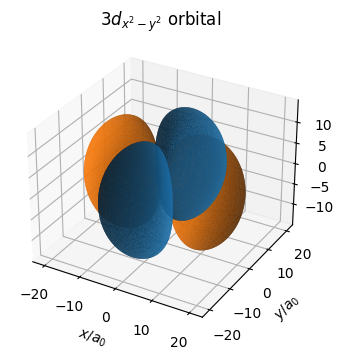

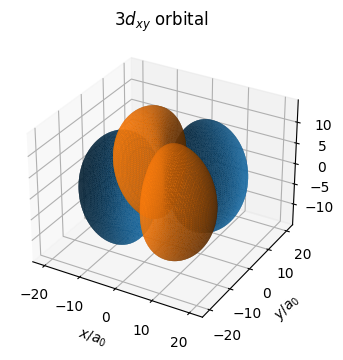

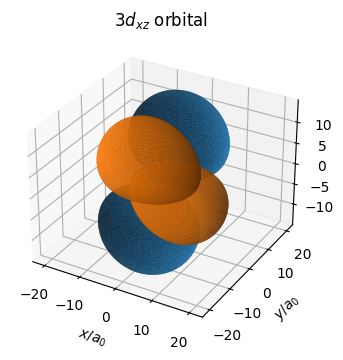

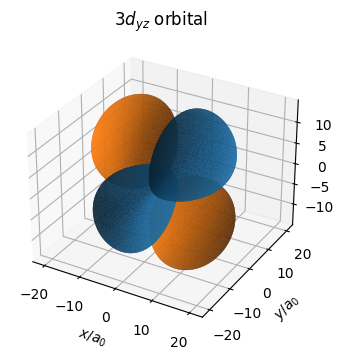

In [18]:
# Iso-surface plots for n=3, l=1,2

iso_plot(R3pz_cart, 23, 0.002, r'$3p_z$ orbital')

iso_plot(R3dz2_cart, 22.5, 0.002, r'$3d_{z^2}$ orbital')

iso_plot(R3d_x2y2_cart, 22.5, 0.002, r'$3d_{x^2-y^2}$ orbital')

iso_plot(R3d_xy_cart, 22.5, 0.002, r'$3d_{xy}$ orbital')

iso_plot(R3d_xz_cart, 22.5, 0.002, r'$3d_{xz}$ orbital')

iso_plot(R3d_yz_cart, 22.5, 0.002, r'$3d_{yz}$ orbital')

For the $3p$ orbital, it is clear that there is 1 radial node with sign inversion. Otherwise, it is still azimuthally symmetric with 1 nodal plane.

For the $3d$ orbitals, they always have 2 angular nodes. For all orbitals except $3d_{z^2}$ and $3d_{x^2-y^2}$, they are parallel to the principal planes.

## Section 4: Contour plots

In [19]:
x = np.linspace(-30.0, 30.0, 100)
y = np.linspace(-30.0, 30.0, 100)
X, Y = np.meshgrid(x, y)

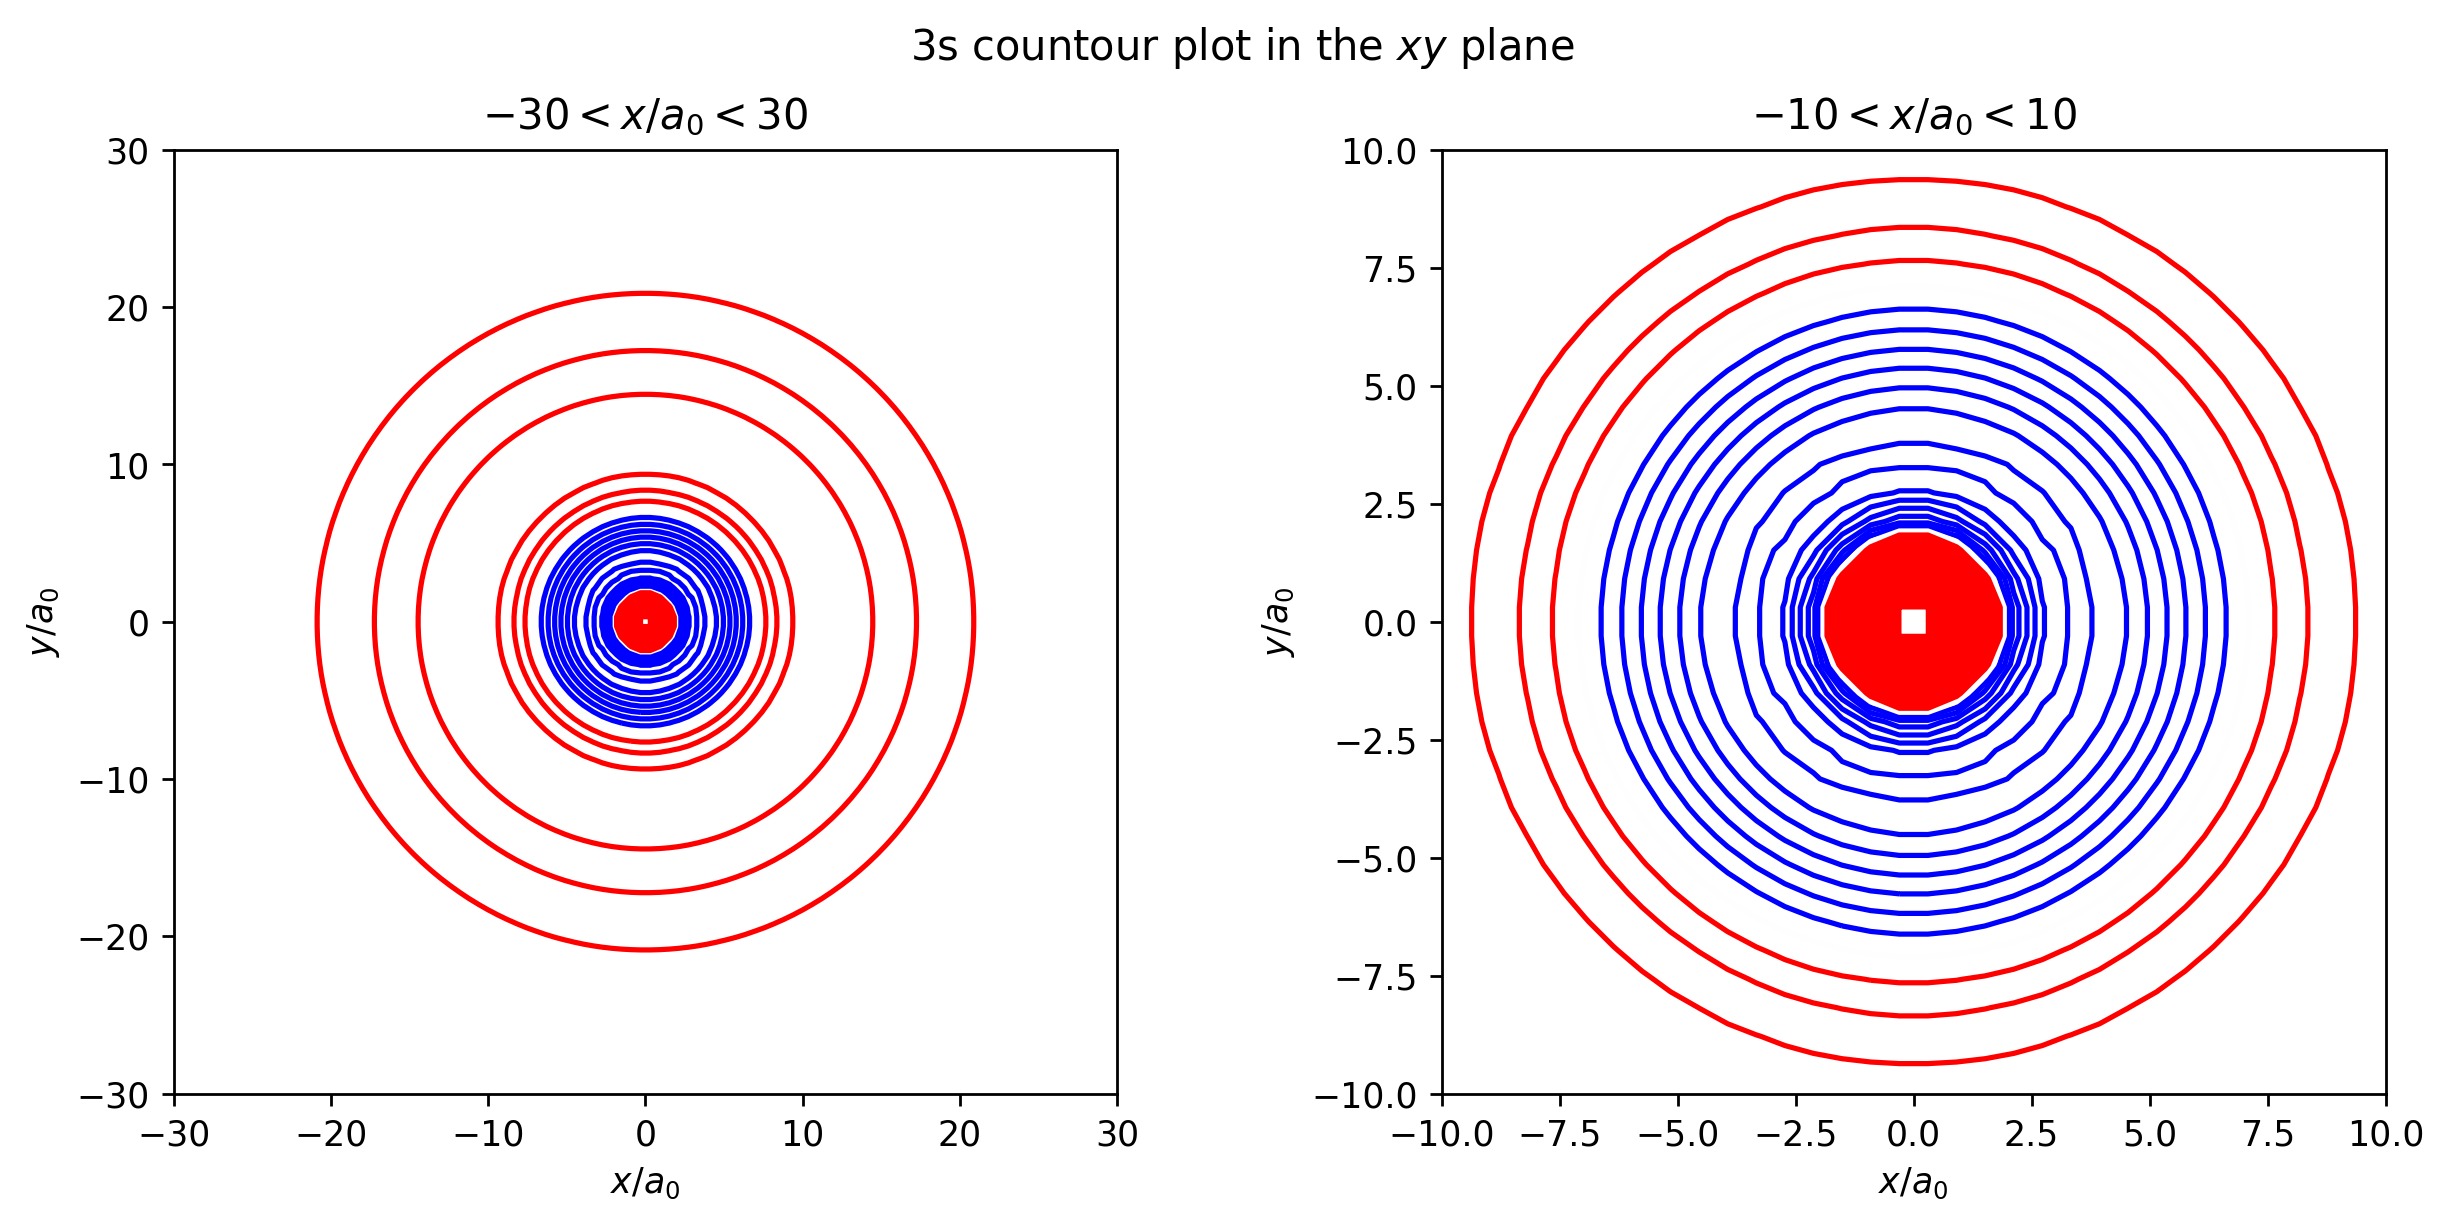

In [25]:
# Contour plots of 3s
%matplotlib inline
plt.rcParams['figure.dpi'] = 250

Z = R3s_cart(X, Y, 0.0)
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle(r"$3\mathrm{s}$ countour plot in the $xy$ plane")
fig.set_size_inches(12, 5)

ax1.set_aspect("equal")
ax1.set_title(r"$-30<x/a_0<30$")
ax1.set_xlabel(r"$x / a_0$")
ax1.set_ylabel(r"$y / a_0$")

ax1.contour(x, y, Z, cmap="bwr", vmin=-10E-5, vmax=10E-5, levels=50)

ax2.set_aspect("equal")
ax2.set_xlim([-10,10])
ax2.set_ylim([-10,10])
ax2.set_title(r"$-10<x/a_0<10$")
ax2.set_xlabel(r"$x / a_0$")
ax2.set_ylabel(r"$y / a_0$")

ax2.contour(x, y, Z, cmap="bwr", vmin=-10E-5, vmax=10E-5, levels=50)

plt.show()

The plot to the left shows the contours of most of the $3s$ orbital, while the one on the right shows the inner structure.

From this, it can be seen that the orbital has 2 radial nodes (causing sign changes). The contour lines also get denser around these nodes, indicating the presence of turning points. The rate of change of the radial function is also much higher near $r=0$, as shown by the density of red contours. This agrees with the plot of $R_{3s}$ as a function of $r$.

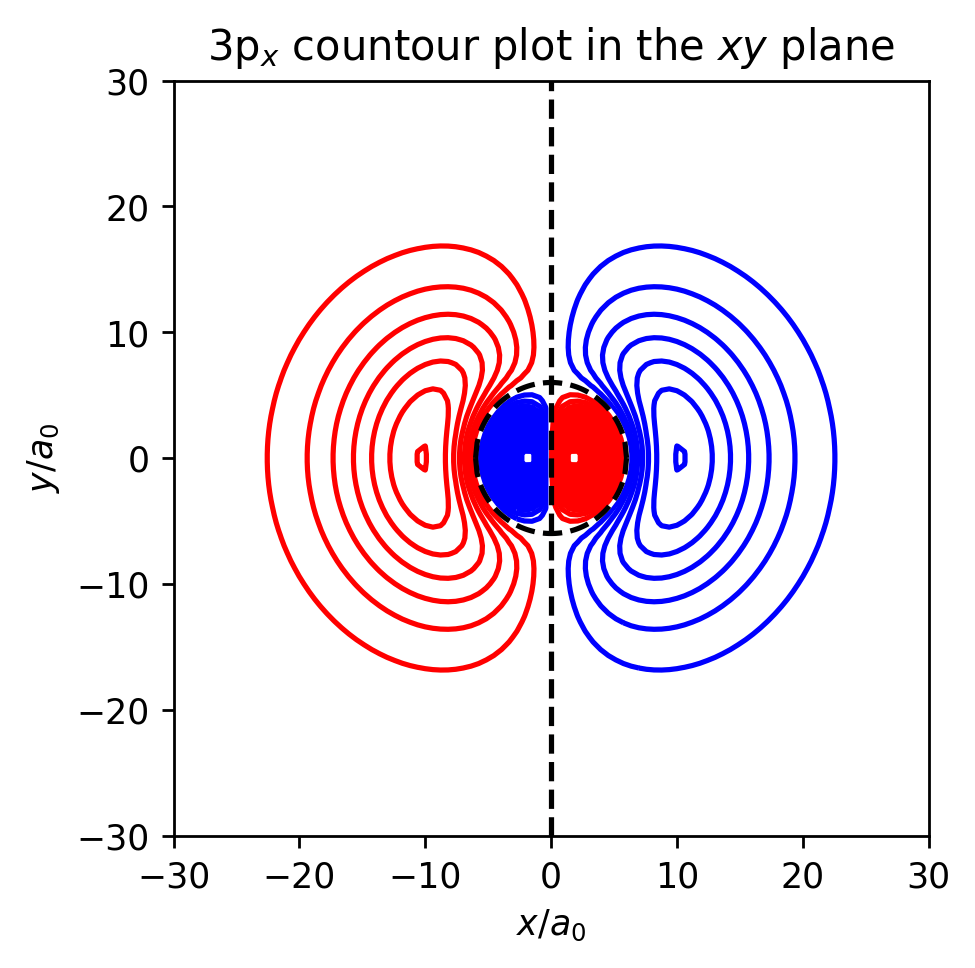

In [26]:
# Contour plot of 3p

Z = R3px_cart(X, Y, 0.0)
fig, ax = plt.subplots(1, 1)
ax.set_aspect("equal")
plt.title(r"$3\mathrm{p}_x$ countour plot in the $xy$ plane")
plt.xlabel(r"$x / a_0$")
plt.ylabel(r"$y / a_0$")

plt.contour(x, y, Z, cmap="bwr", vmin=-10E-5, vmax=10E-5, levels=50)
plt.plot([0.0, 0.0], [-30.0, 30.0], color="black", linestyle="dashed")
x_1 = np.linspace(-6.0, 6.0, 100)
plt.plot(x_1, np.sqrt(36.0 - x_1**2), color="black", linestyle="dashed")
plt.plot(x_1, -np.sqrt(36.0 - x_1**2), color="black", linestyle="dashed")
plt.show()

This plot of the $3p$ orbital shows one radial node, as well as one angular node at $x=0$

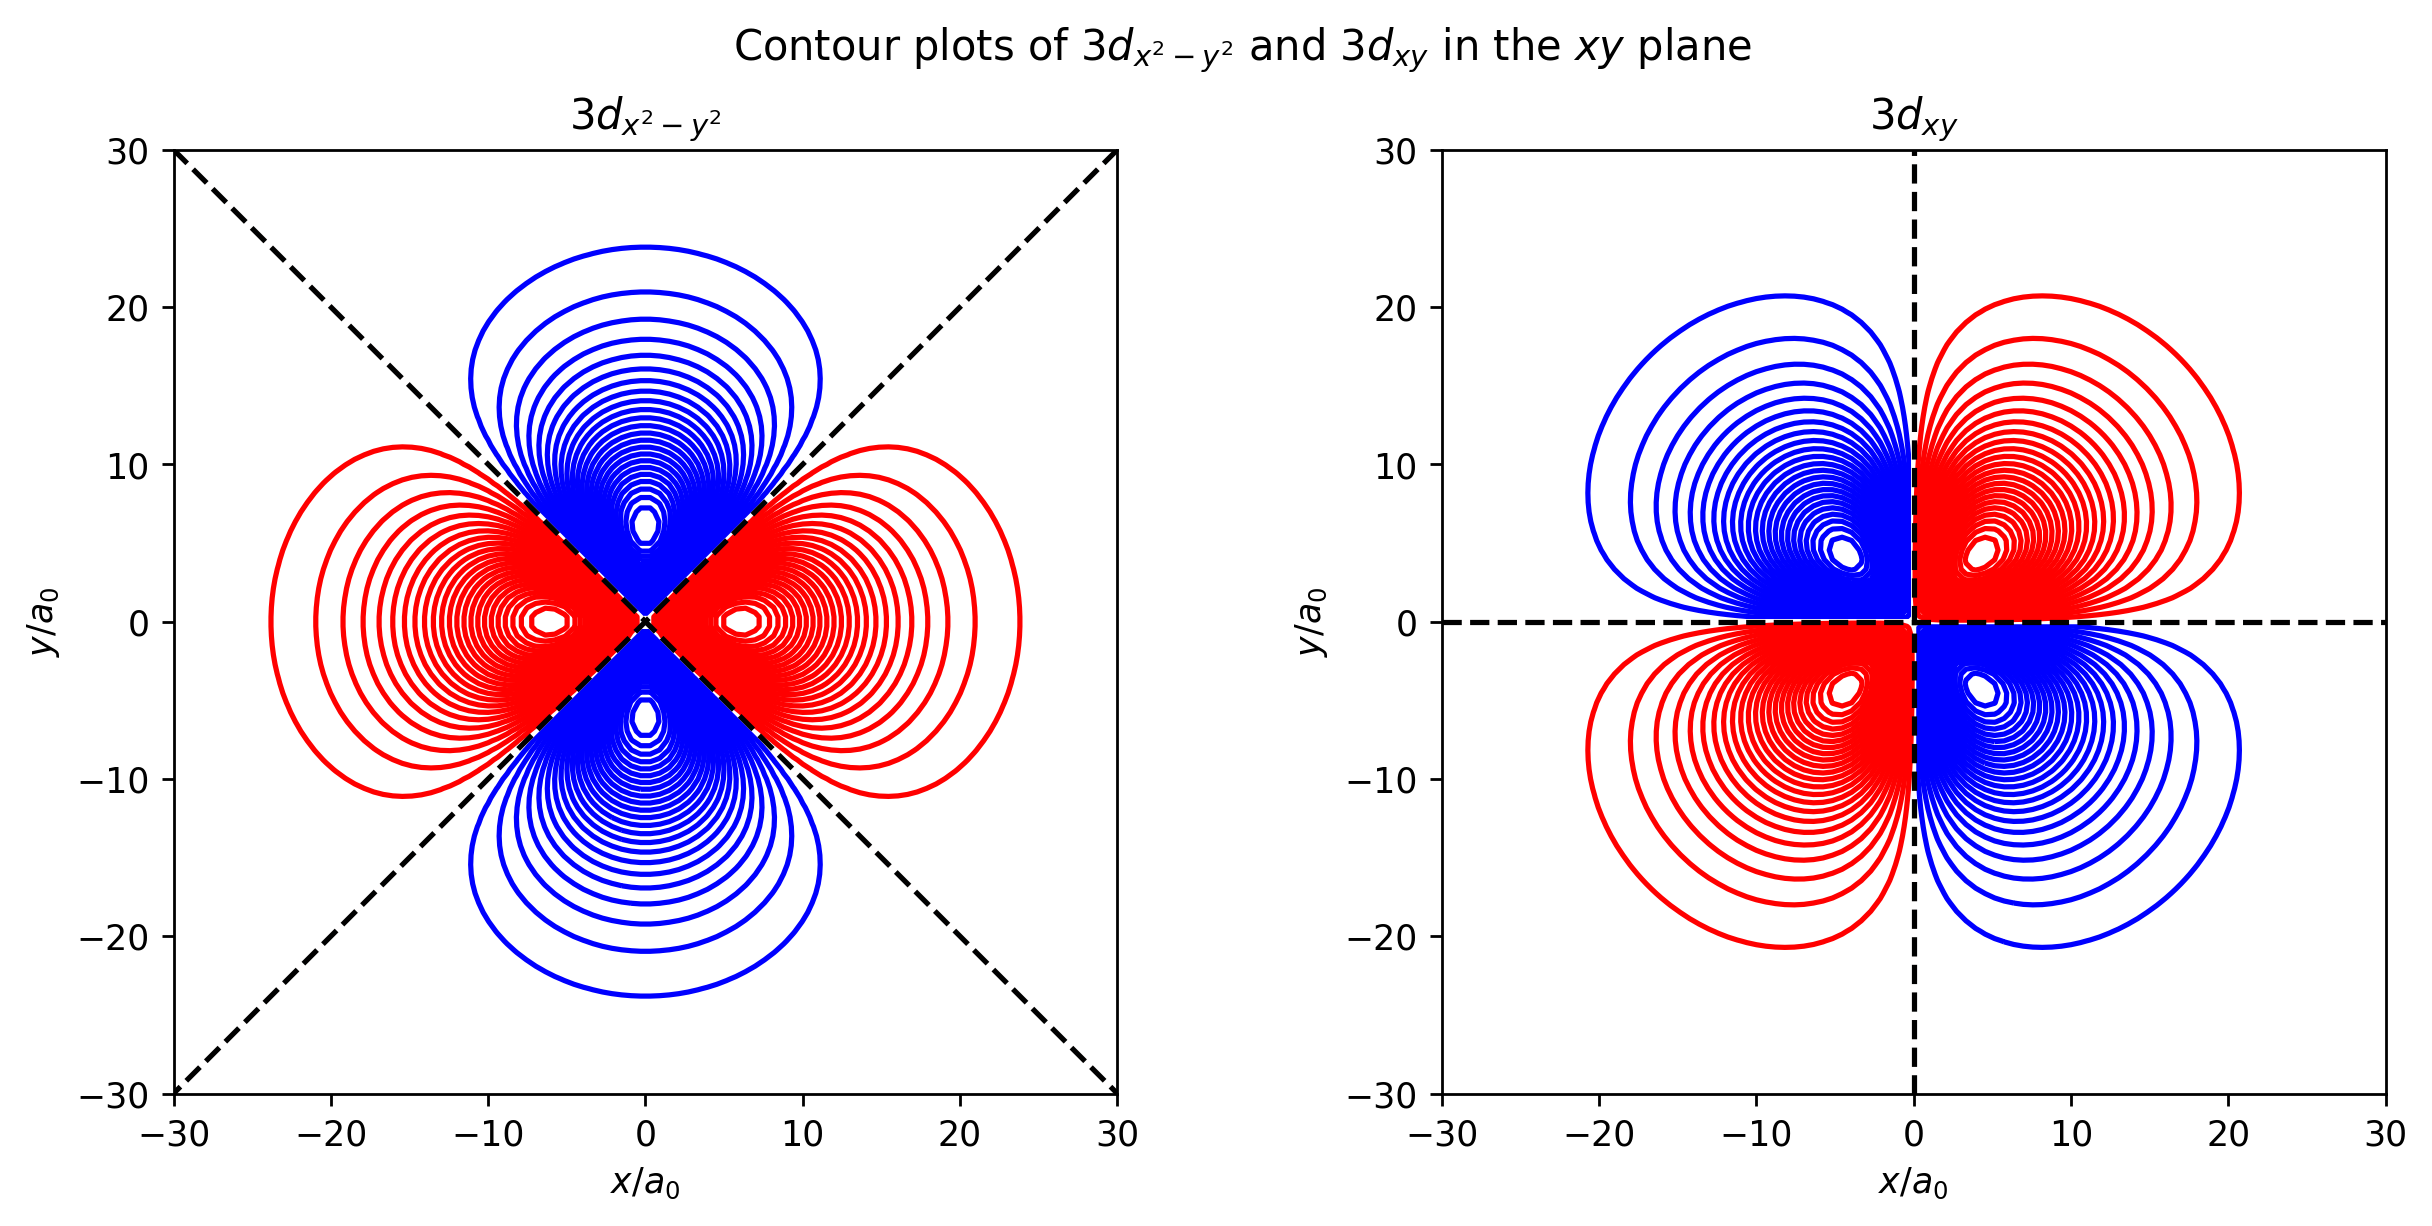

In [27]:
# Contour plots of 3d

Zx2y2 = R3d_x2y2_cart(X, Y, 0.0)
Zxy = R3d_xy_cart(X, Y, 0.0)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle(r"Contour plots of $3d_{x^2-y^2}$ and $3d_{xy}$ in the $xy$ plane")
fig.set_size_inches(12, 5)

ax1.set_aspect("equal")
ax1.set_title(r"$3d_{x^2-y^2}$")
ax1.set_xlabel(r"$x / a_0$")
ax1.set_ylabel(r"$y / a_0$")

ax1.contour(x, y, Zx2y2, cmap="bwr", vmin=-10E-5, vmax=10E-5, levels=50)
ax1.plot([30.0, -30.0], [30.0, -30.0], color="black", linestyle="dashed")
ax1.plot([-30.0, 30.0], [30.0, -30.0], color="black", linestyle="dashed")

ax2.set_aspect("equal")
ax2.set_title(r"$3d_{xy}$")
ax2.set_xlabel(r"$x / a_0$")
ax2.set_ylabel(r"$y / a_0$")

ax2.contour(x, y, Zxy, cmap="bwr", vmin=-10E-5, vmax=10E-5, levels=50)
ax2.plot([0.0, 0.0], [-30.0, 30.0], color="black", linestyle="dashed")
ax2.plot([-30.0, 30.0], [0.0, 0.0], color="black", linestyle="dashed")

plt.show()

The $3d$ orbitals have no radial nodes. The $3d_{x^2-y^2}$ orbital has two angular nodes, making the orbital zero when $x=y$ and $x=-y$. The $3d_{xy}$ orbital has one angular node at $x=0$ and $y=0$.

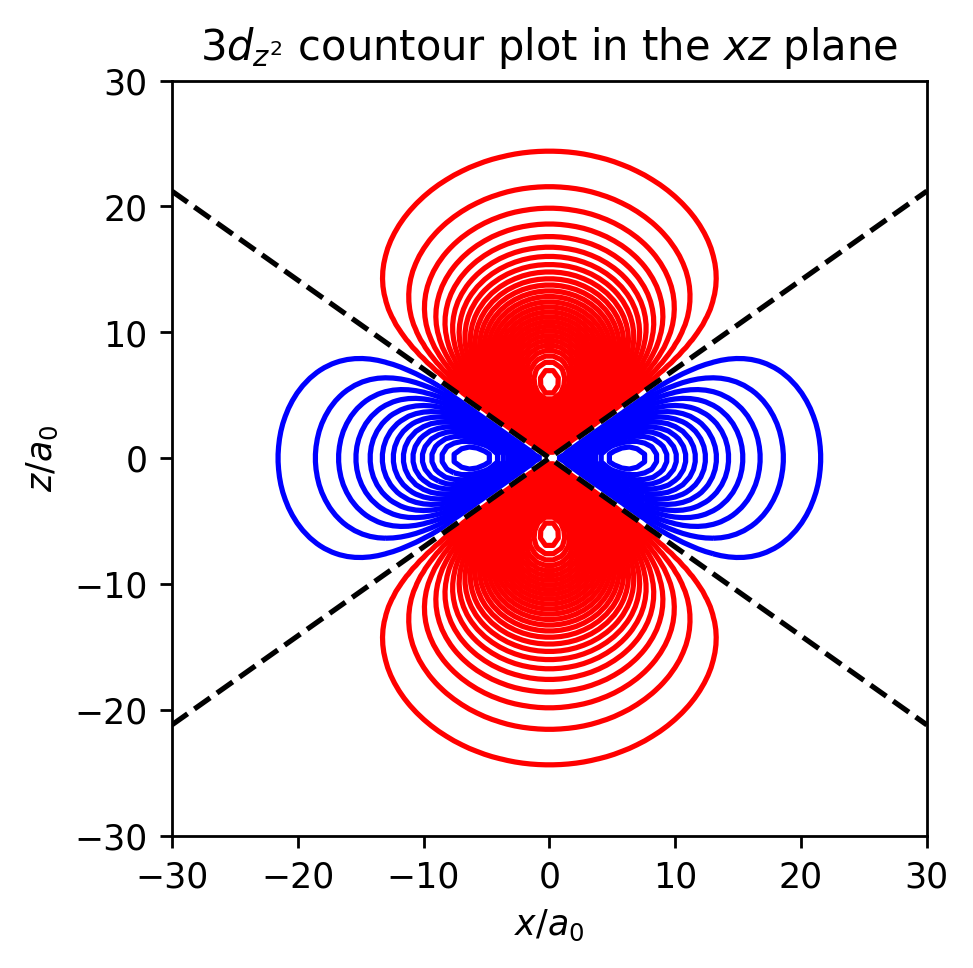

In [28]:
Z = R3dz2_cart(X, 0.0, Y)
fig, ax = plt.subplots(1, 1)
ax.set_aspect("equal")
plt.title(r"$3d_{z^2}$ countour plot in the $xz$ plane")
plt.xlabel(r"$x / a_0$")
plt.ylabel(r"$z / a_0$")

plt.contour(x, y, Z, cmap="bwr", vmin=-10E-5, vmax=10E-5, levels=50)
plt.plot([-30.0, 30.0], [-21.21, 21.21], color="black", linestyle="dashed")
plt.plot([-30.0, 30.0], [21.21, -21.21], color="black", linestyle="dashed")
plt.show()

The $3d_{z^2}$ orbital has two angular nodes when $r^2=3z^2$